<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Caminantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

### Se escribe el código para realizar la gráfica en 3D

In [ ]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


In [ ]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

### Definimos las distribuciones 2D objetivo:

In [114]:
# Función de distribución Normal bivariada
def ptarget(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean, cov=var)

In [115]:
# Función de distribución de Griewank bivariada
def griewank(x, y, h=0, k=0):
    term1 = 1 + (x - h)**2 + (y - k)**2 / 4000
    term2 = np.cos((x - h) / np.sqrt(1)) * np.cos((y - k) / np.sqrt(2))
    return term1 - term2


In [116]:
# Función de distribución de Himmelblau bivariada
def himmelblau(x, y):
    term1 = ( (x )**2 + (y) - 11 )**2
    term2 = ( (x ) + (y )**2 - 7 )**2
    return term1 + term2


In [117]:
# Función de distribución exponencial bivariada
def exponencial(x, y, lambda_x=1, lambda_y=1):
    return lambda_x * lambda_y * np.exp(-lambda_x * x - lambda_y * y)

In [118]:
# Función de distribución  de Pareto bivariada
def pareto(x, y, alpha_x=1, alpha_y=1):
    return (alpha_x * alpha_y) / (x**(alpha_x + 1) * y**(alpha_y + 1))

In [119]:
# Función de distribución Beta bivariada
from scipy.special import beta as beta_func
def beta(x, y, alpha=2, beta=5):
    return (1 / beta_func(alpha, beta)) * (x**(alpha - 1)) * (y**(beta - 1))

### Construimos un método para el algoritmo Metropolis-Hastings, sus parámetros de entrada serán:
- p: distribución objetivo
- n: número de iteraciones del algoritmo
- x0, y0: punto de partida.
- step: tamaño del paso

In [ ]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

# DISTRIBUCIÓN HIMMELBLAU

La distribucion Himmelblau es una distribucipon que se utiliza en oprimización, es conocida por contar con múltiples mínimos locales.

Está dada por $$f(x,y)= \frac{x^2+y^2}{4000}-(cos(x)+1)( cos (\frac{y}{\sqrt{2}})+1)$$

Text(0.5, 0, '$\\pi(x,y)$')

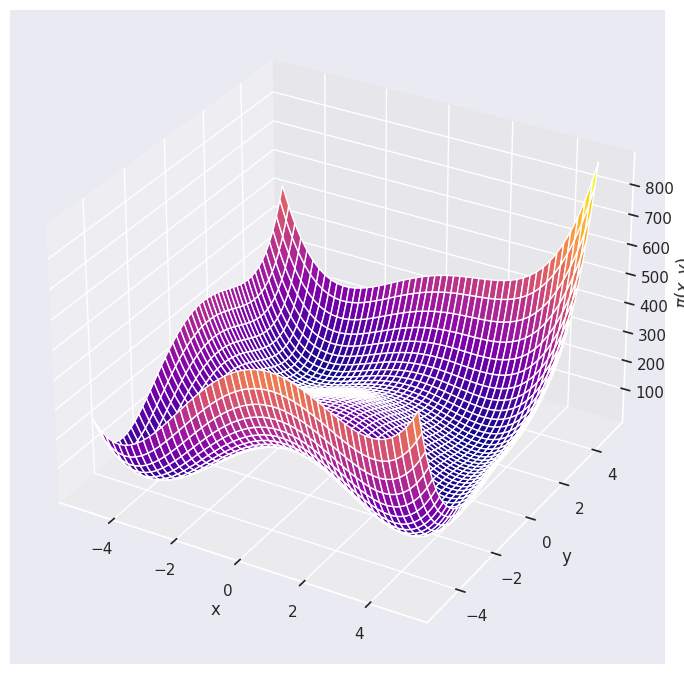

In [83]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z =himmelblau(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


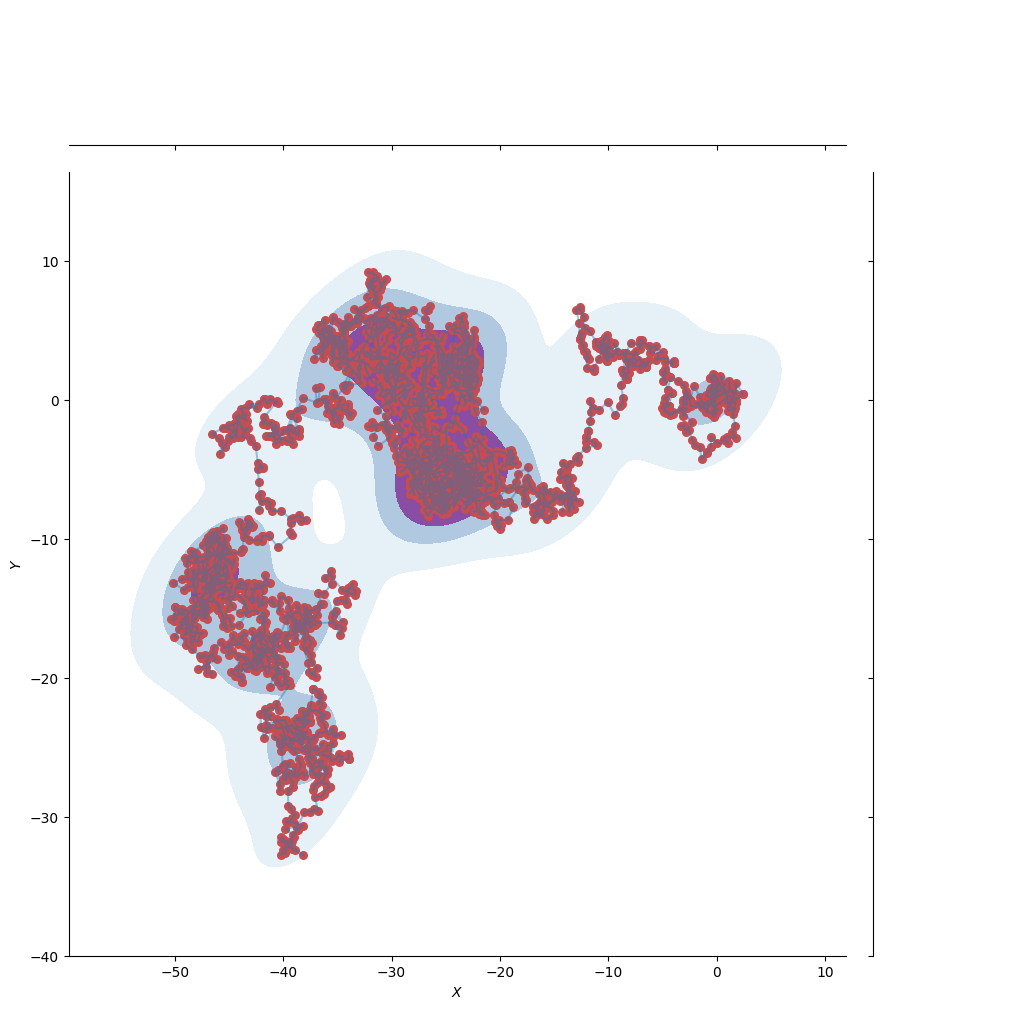

In [84]:
# generate the samples
samples = metropolis_hastings(himmelblau, 3000, 0, 0, 0.5)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()

#DISTRIBUCIÓN DE PARETO BIVARIADA

La distribución de Pareto bivariada es un tipo de distribución compuetsa (por distribuciones Pareto y Gumbel), se carateriza por tener una cola pesada que decrece a una tasa polinómica. Se utiliza con frecuencia en economía y finanzas.

La función esta dada por:
$$ f(x,y,\alpha_x, \alpha_y)=\frac{α_x α_y}{x^{α_x+1}y^{α_y+1}} \hspace{4mm} x,y > 0$$

Text(0.5, 0, '$\\pi(x,y)$')

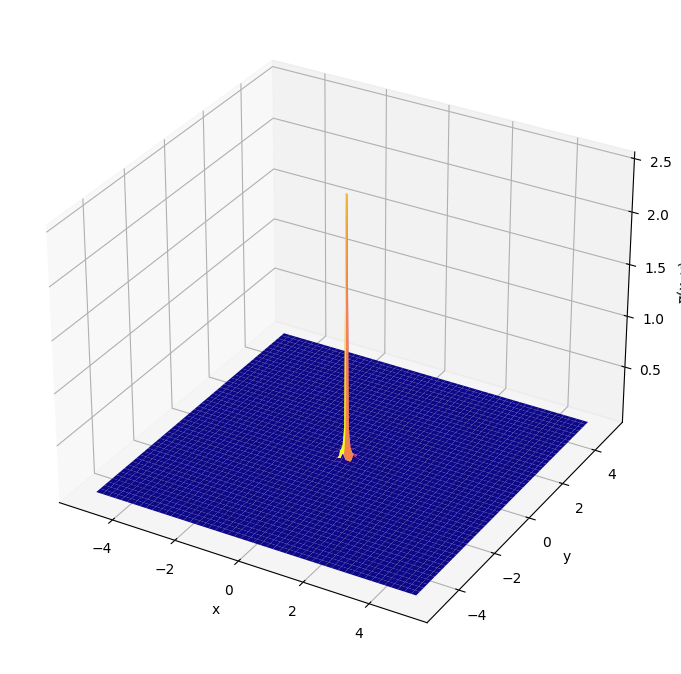

In [90]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z =pareto(X,Y,alpha_x=1, alpha_y=1)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


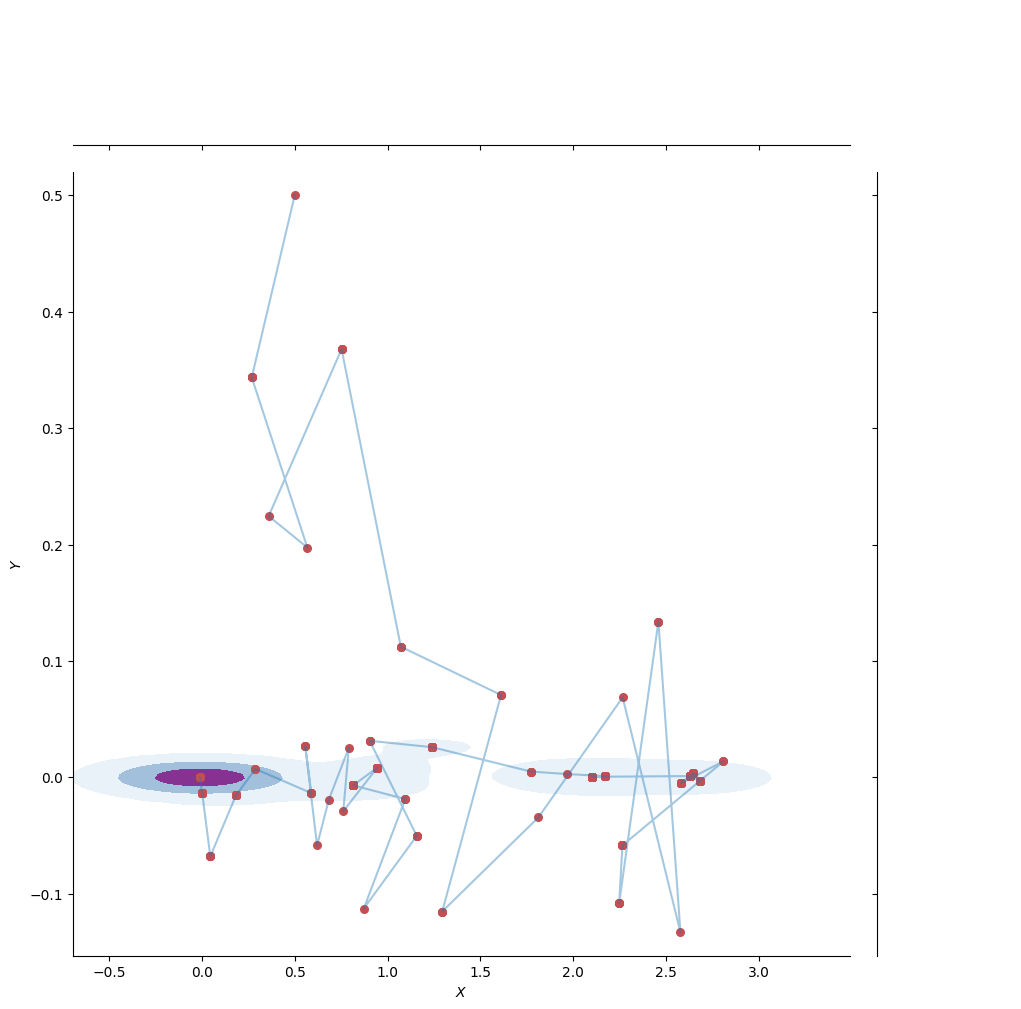

In [95]:
# generate the samples
samples = metropolis_hastings(pareto, 3000, 0.5,0.5, 0.3)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()

# DISTRIBUCIÓN DE EXPONENCIAL BIVARIADA


La distribución exponencial bivariada es una extensión a dos dimensiones de la función de distribución exponencial, se utiliza comunmente para modelar el tiempo hasta el evento cuando intervienen múltples variables.

La función está dada por:

$$f(,x,y, λ_z, λ_y)=λ_x λ_y e^{-λ_x x - λ_y y}$$

Text(0.5, 0, '$\\pi(x,y)$')

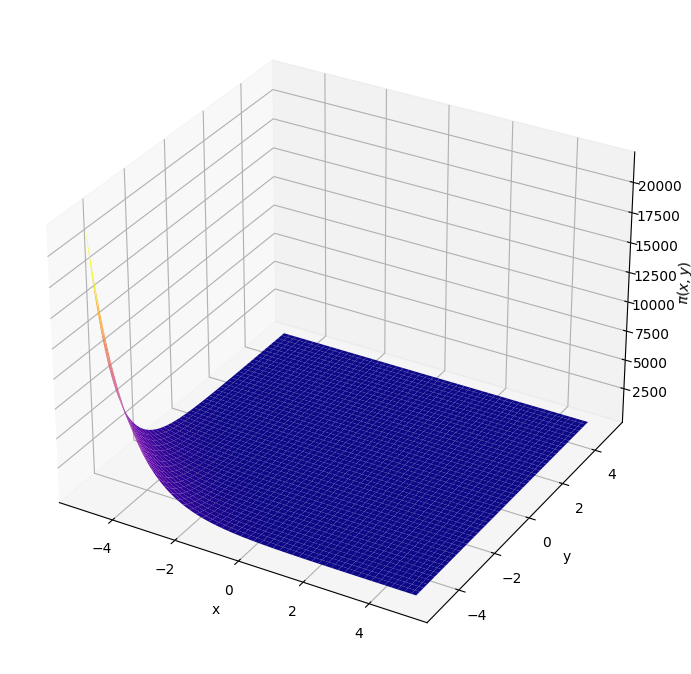

In [103]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z =exponencial(X,Y, lambda_x=1, lambda_y=1)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


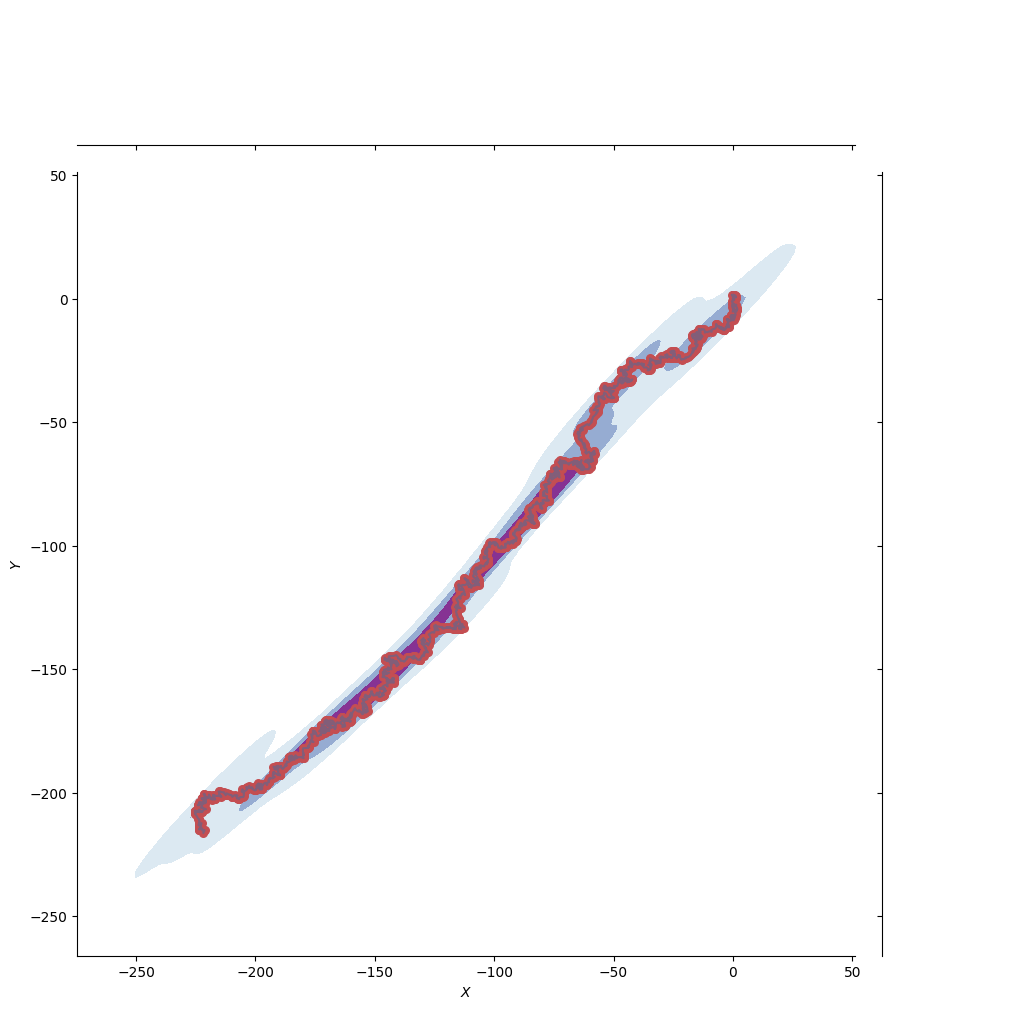

In [106]:
# generate the samples
samples = metropolis_hastings(exponencial, 3000, 1,1, 0.5)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()

# DISTRIBUCIÓN BETA BIVARIADA

La distribución Beta bivariada es utilizada para modelar variales que se encuentran acotadas en [0,1[. Es una función utila cuando los datos tienen restricciones.

Está dada por: $$ f(x,y,α, β)= \frac{1}{Β(α, β)}x^{α-1}y^{\beta-1} \hspace{4mm} x,y \in [0,1]$$

Text(0.5, 0, '$\\pi(x,y)$')

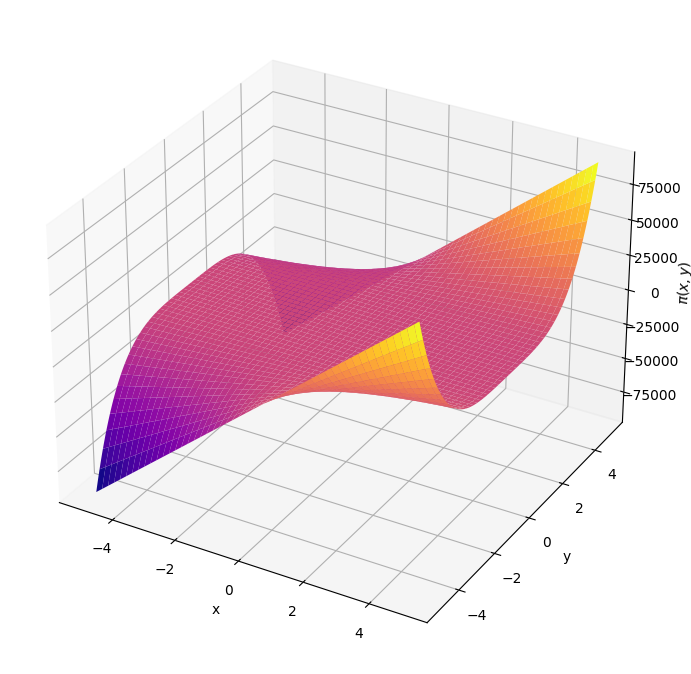

In [112]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z =beta(X,Y,alpha=2, beta=5)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


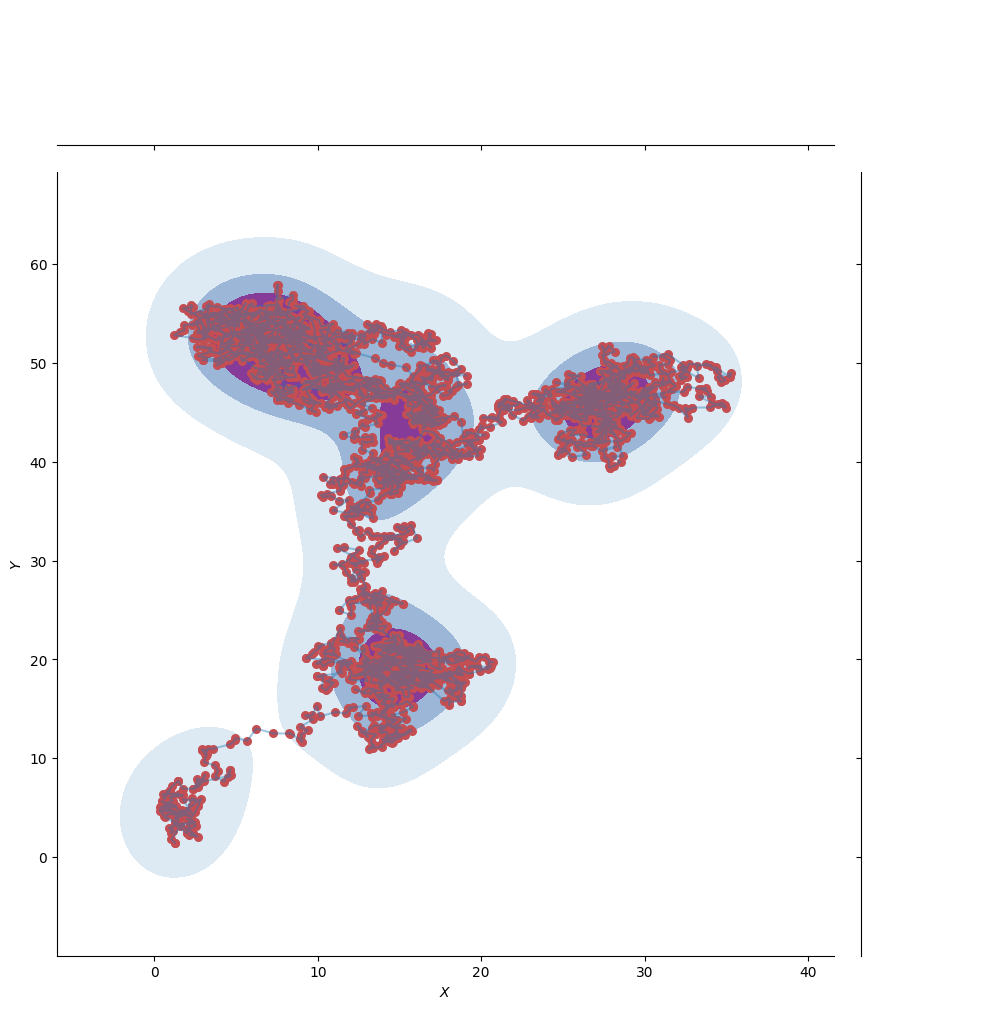

In [113]:
# generate the samples
samples = metropolis_hastings(beta, 3000, 1,1, 0.5)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()